## Introduction
Research Questions (Q): 

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
3. Which genres have high avg. popularity?
4. Which genres have highest number of movies with an voting avg. >=8?


Research Hypotheses (H): 

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.


In [ ]:
import pandas as pd

### Data Cleaning

In [39]:
movies = pd.read_csv("/Users/koapam/Desktop/Coding_Workspace/Python_Workspace/files_folder/projects/imdb_movies.csv")
movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
# pd.set_option('display.max.rows', 11000)
# pd.set_option('display.max.columns', 22)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [40]:
movies.info()
# movies[movies.duplicated()].sum()
movies[movies.duplicated()].count()
# movies[movies.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                      1
imdb_id                 1
popularity              1
budget                  1
revenue                 1
original_title          1
cast                    1
homepage                0
director                1
tagline                 1
keywords                1
overview                1
runtime                 1
genres                  1
production_companies    1
release_date            1
vote_count              1
vote_average            1
release_year            1
budget_adj              1
revenue_adj             1
dtype: int64

In [41]:
movies.drop_duplicates(inplace = True)

In [42]:
# Since we only focus on the movies with genres, we will drop the rows with missing values in the genres column.
movies.dropna(subset = ['genres'], inplace = True)

### Data Analysis

In [43]:
movies['profit'] = movies['revenue'] - movies['budget']

In [44]:
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_year','vote_count','vote_average','profit']]
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015,2947,7.3,1316249360


In [ ]:
from pandas import Series, DataFrame

In [45]:
# split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split = movies_genre['genres'].str.split('|').astype(object).apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre

/var/folders/ln/y2zb_fq101s1gcvy6lnz_0tw0000gn/T/ipykernel_7487/1483474100.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').astype(object).apply(Series, 1).stack()


,popularity,budget,revenue,original_title,runtime,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,2015,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1966,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,1966,22,5.4,0,Comedy


#### 1. Which genres are the most common (number of movies made)?


In [46]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

,original_title
genres_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

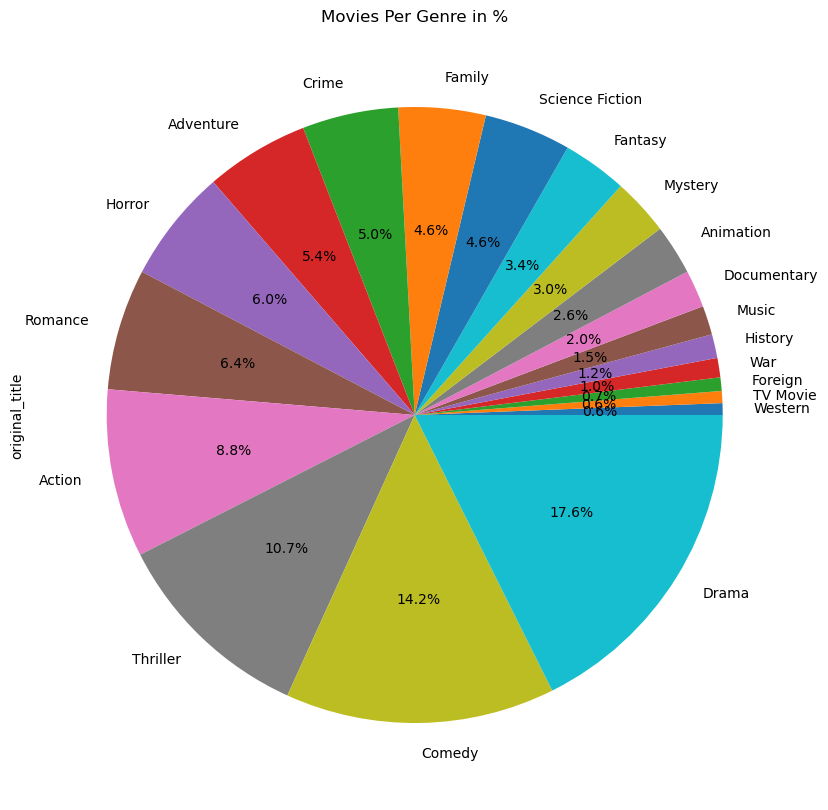

In [47]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct= '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

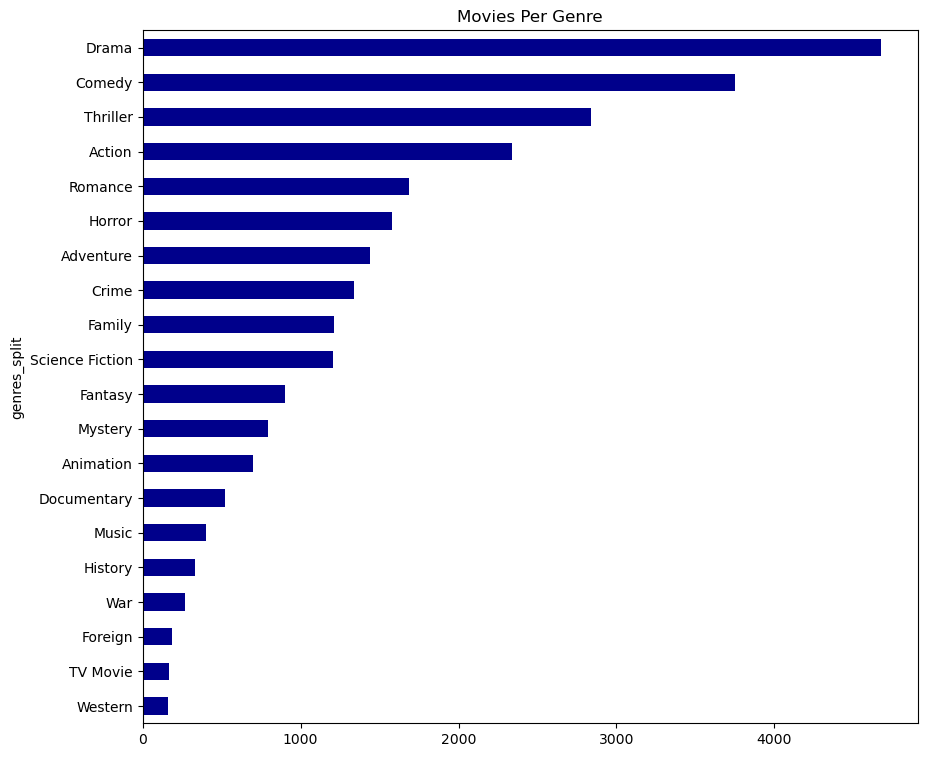

In [48]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue',figsize = (10,9))

#### 2. Which genres have high avg. budget and revenue?


In [54]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,2000.056208,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,1999.388851,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,2003.995708,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,2000.816240,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,1999.491137,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,2000.774167,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,2000.292576,420.741266,5.863537,63701071.733624


In [55]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

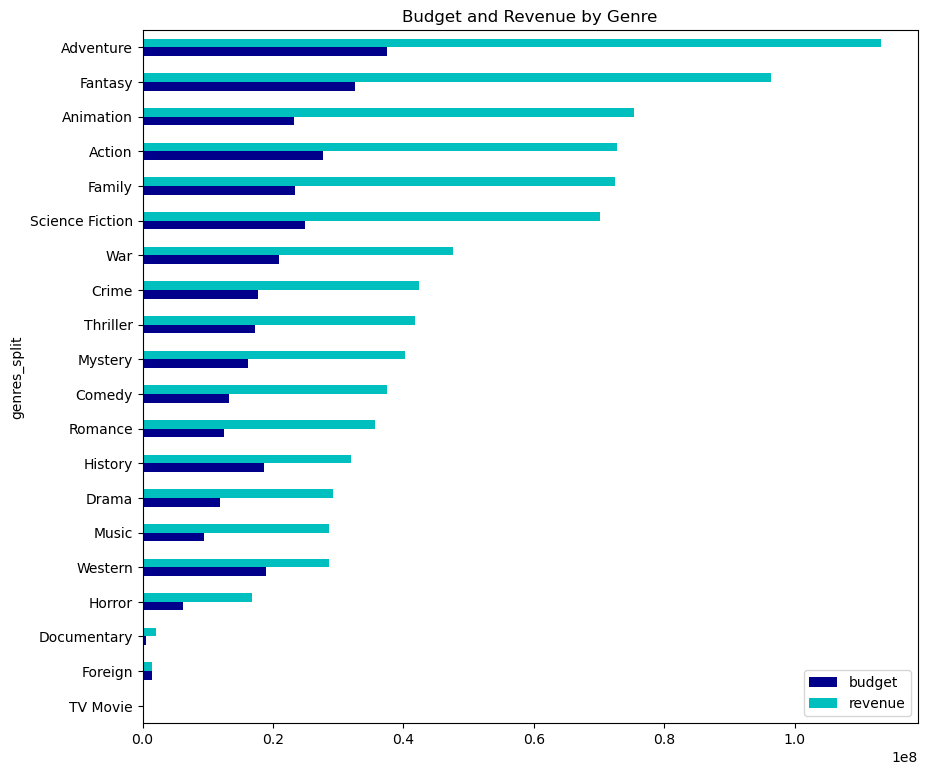

In [56]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'),figsize = (10,9))

#### 2.5 Which genres have high avg. Profit?

In [ ]:
genres_avg

In [ ]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

In [ ]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = 'DarkBlue',figsize = (10,9))

In [ ]:
movies.head()

In [ ]:

#3. Which genres have high avg. popularity?

genres_avg

In [ ]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)

In [ ]:
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = 'DarkBlue',figsize = (10,9))

In [ ]:

# 4. Which genres have highest number of movies with an voting avg. >=8?

In [ ]:
movies_genre.head()

In [ ]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [ ]:
genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [ ]:
genres_vote

In [ ]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'DarkBlue',figsize = (10,9))

In [ ]:
### Research Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.


In [ ]:

movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity','budget','revenue','original_title','runtime','genres','release_date','vote_count','vote_average','profit']]

In [ ]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman')

In [ ]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

In [ ]:
# 2. The best movies according to popularity return high profit and revenue.
movies_counted.corr(method = 'spearman')

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

In [ ]:
#3. Highly budgeted movies return high profit.
movies_counted.head()

In [ ]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

In [ ]:
4. Highly budgeted movies have a high popularity.

In [ ]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,5))
plt.show()

In [ ]:
5. Look at Profit Per Genre Per Year

In [ ]:
movies_genre.head()

In [ ]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year','genres_split'])['profit'].mean())

In [ ]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

In [ ]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')